In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pygmt

In [2]:
states = gpd.read_file(r'data/ne/ne_10m_admin_1_states_provinces.shp')
rivers = gpd.read_file(r'data/ne/ne_10m_rivers_north_america.shp')
labels = gpd.read_file(r'data/ne/10m_cultural/ne_10m_populated_places.shp')

In [3]:
co = states[states.name=='Colorado'].geometry
co_pop = gpd.clip(labels, co)
co_pop = co_pop[co_pop.NAME.isin(['Denver', 'Boulder', 'Colorado Springs', 'Grand Junction', 'Durango',
                                 'Pueblo', 'Lamar', 'Fort Collins', 'Montrose'])]

In [4]:
region = [-125, -65, 25, 50]

In [5]:
fig = pygmt.Figure()
fig.basemap(region=region, projection="M4i", frame=True)
#fig.grdimage("@srtm_relief_03s", shading=True, cmap='oleron')
fig.grdimage(grid='data/ne/NE2_HR_LC_SR_W_DR.tif')
fig.coast(shorelines=True)
fig.plot(data=states.geometry, pen="0.02p,black")
fig.plot(x=co_pop.geometry.x, y=co_pop.geometry.y, size=(co_pop.NATSCALE.values/9000),
           style='cc', pen="black",)
#fig.plot(x=data.longitude, y=data.latitude, style="c0.3c", color="white", pen="black")
fig.text(text=co_pop.NAME,x=co_pop.geometry.x+0.2, y=co_pop.geometry.y+0.15, font='2p')


fig.text(text=["https://www.naturalearthdata.com/"], x=-90, y=26, font="4p")


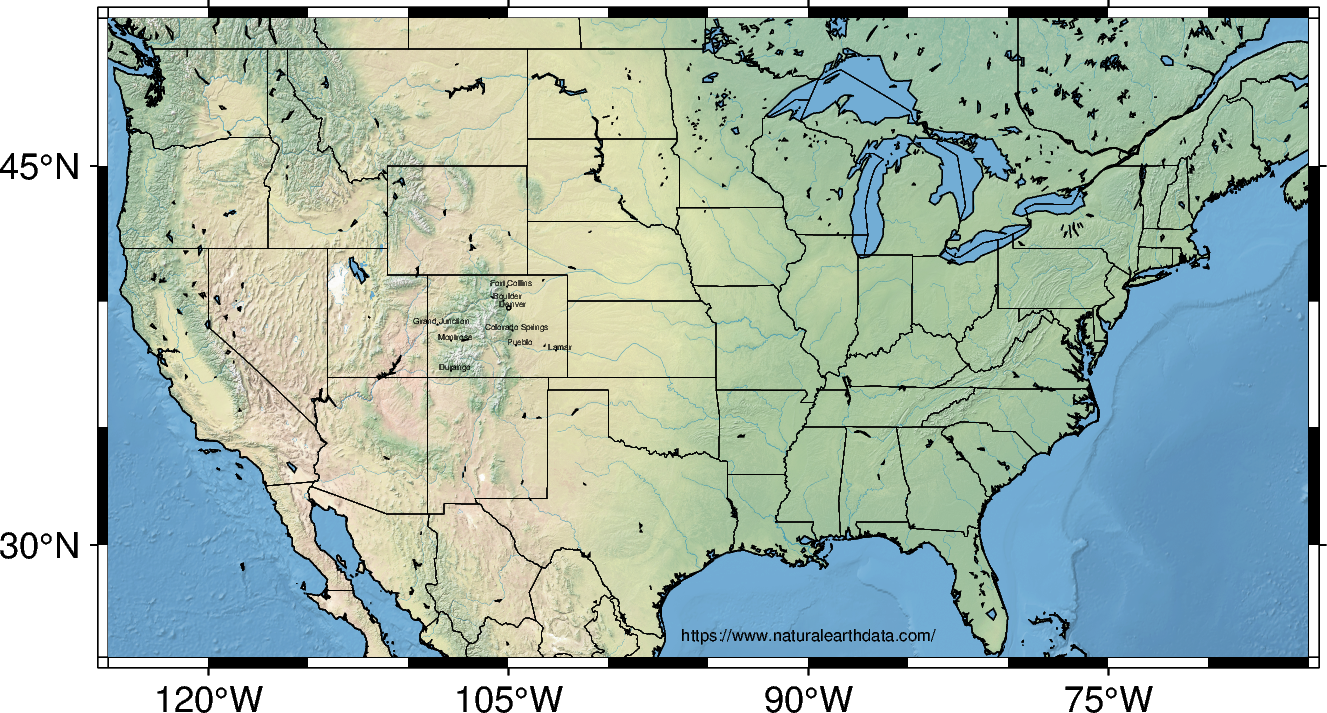

In [6]:
fig.show(width=1000)

In [7]:
fig.savefig('Day_13.png')